# Rotation Data Analysis Using OLS - Slicing method
OLS-Slicing method first slice the raw data into several pieces to reduce memory requirement. Then perform OLS on each piece.

In [1]:
from tools.ols import *
from matplotlib.ticker import ScalarFormatter

# Reading Raw Data
Reading data method is the same as DLS

# Slicing dataset
Slice the file into pieces. Do OLS in each piece. Visualize them in the end.

In [23]:
%%time 

# read run 8 data files
data_df = quick_read(11)

# name columns and add a new column - 'day'
data_df.columns = ['index','sidereal_time','phi_R','delta_f']

CPU times: user 1min 57s, sys: 12.3 s, total: 2min 10s
Wall time: 2min 5s


# Slicing dataset
Slice the file into pieces, given the sliced number *slices*. In *ols_slicing* function, *ols* is called to fit every frequency.

In [24]:
%%time
slices = 65
params = ols_slicing(data_df, slices)  # get OLS fitting parameters

CPU times: user 1min 15s, sys: 2.93 s, total: 1min 18s
Wall time: 1min 13s


# Visualizing Data

## Parameter table
|Parameter|A|$S_{2\omega_R}$|$C_{2\omega_R}$|$S_{2\omega_R+\omega_\oplus}$|$C_{2\omega_R+\omega_\oplus}$|$S_{2\omega_R-\omega_\oplus}$|$C_{2\omega_R-\omega_\oplus}$|$S_{2\omega_R+2\omega_\oplus}$|$C_{2\omega_R+2\omega_\oplus}$|$S_{2\omega_R-2\omega_\oplus}$|$C_{2\omega_R-2\omega_\oplus}$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$\beta$|$\beta_0$|$\beta_1$|$\beta_2$|$\beta_3$|$\beta_4$|$\beta_5$|$\beta_6$|$\beta_7$|$\beta_8$|$\beta_9$|$\beta_{10}$|
|*index_vi*|0|1|2|3|4|5|6|7|8|9|10|
As defined above, $\beta$ is just another name for parameter $S_{...}$ or $C_{...}$. 

$\beta$ is used in fitting, $S_{...}$ and $C_{...}$ are used in physics related equation.

In [25]:
index_vi = 2  # selecting a parameter to visualize

label_dict = {'0': 'A', '1': '$S_{2\omega_R}$', '2': '$C_{2\omega_R}$',
             '3': '$S_{2\omega_R+\omega_\oplus}$', '4': '$C_{2\omega_R+\omega_\oplus}$',
             '5': '$S_{2\omega_R-\omega_\oplus}$', '6': '$C_{2\omega_R-\omega_\oplus}$',
             '7': '$S_{2\omega_R+2\omega_\oplus}$', '8': '$C_{2\omega_R+2\omega_\oplus}$',
             '9': '$S_{2\omega_R-2\omega_\oplus}$', '10': '$C_{2\omega_R-2\omega_\oplus}$'}  # for making ylabel

# add a new column - 'day'
params['day'] = params['time'] / (60 * 60 * 24)

# extracting fitting parameters, beta, and their standard deviations, sigma 
day = select_param(params, 'day') 
beta = select_param(params, 'beta')
sigma = select_param(params, 'sigma')

# selecting one parameter to visualize
beta_vi = beta[:, index_vi]
sigma_vi = sigma[:, index_vi]

# Writing selected parameters

In [26]:
# use DataFrame to write
filename = './Data/OLS_slicing/OLS_slicing_para_index' + str(index_vi) + '.txt'
df_write = pd.DataFrame({'para': beta_vi, 'std': sigma_vi, 'day': day})  # construct from a dictionary
df_write.to_csv(filename, index_label='Index')

## Plotting
Visualize the selected parameter for each slices (subset). 'Days' on the horizontal axis is the solar day starts from the origin of the local sidereal frame.

The data is not starting from Day 0. This is because:
1. Time is averaged during the OLS fitting process
2. Our experiment is not starting from the origin of the local sidereal frame.

**Note: **You can change the *index_vi* value to see different parameters.

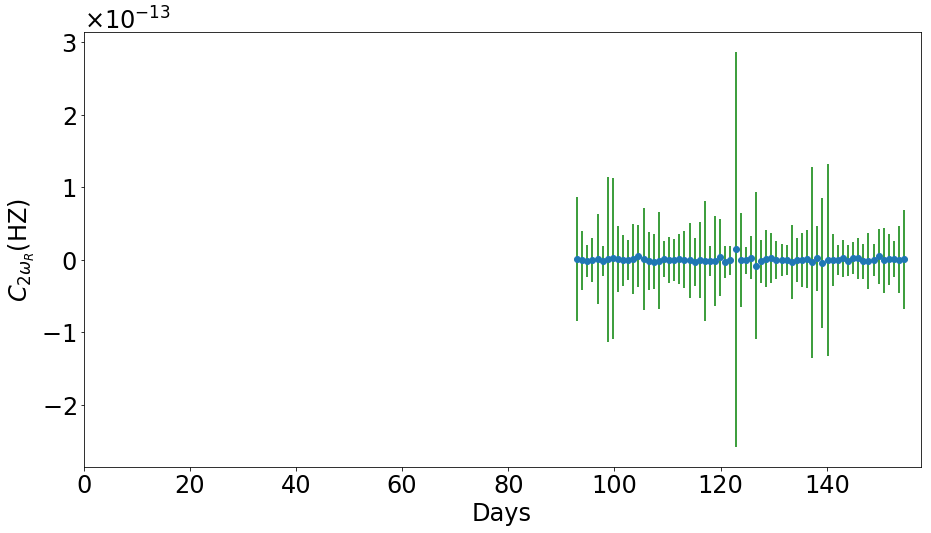

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
ax.errorbar(day, beta_vi, yerr=sigma_vi, ecolor='g', fmt='o')
ax.set_xlabel('Days', fontsize=24)
ax.set_xlim(left=0)  # starts from Day 0
ax.set_ylabel(label_dict[str(index_vi)] + '(HZ)', fontsize=24)  # use created ylabel dictionary for display
ax.tick_params(labelsize=24)

# changing the format of the offset
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax.yaxis.get_offset_text()
t.set_size(24)

plt.show()

# Adding vars together

In [28]:
param_sum = add_params(params)  # for each parameter, sum over sliced subsets

In [29]:
[c_T_Q, c_T_X, c_T_Y, c_T_Z, c_T_M, c_T_u] = cal_co(param_sum)

# for display
c_T_Q_value = str(round(c_T_Q.value,17))
c_T_Q_sigma = str(round(c_T_Q.sigma,17))
c_T_X_value = str(round(c_T_X.value,17))
c_T_X_sigma = str(round(c_T_X.sigma,17))
c_T_Y_value = str(round(c_T_Y.value,17))
c_T_Y_sigma = str(round(c_T_Y.sigma,17))
c_T_Z_value = str(round(c_T_Z.value,17))
c_T_Z_sigma = str(round(c_T_Z.sigma,17))
c_T_M_value = str(round(c_T_M.value,17))
c_T_M_sigma = str(round(c_T_M.sigma,17))
c_T_u_value = str(round(c_T_u.value,17))
c_T_u_sigma = str(round(c_T_u.sigma,17))

| EMS coefficient | result |
| :- | :- |
| $c^T_Q$ | {{c_T_Q_value}}$\pm${{c_T_Q_sigma}} |
| $c^T_Y$ | {{c_T_X_value}}$\pm${{c_T_X_sigma}} |
| $c^T_X$ | {{c_T_Y_value}}$\pm${{c_T_Y_sigma}} |
| $c^T_Z$ | {{c_T_Z_value}}$\pm${{c_T_Z_sigma}} |
| $c^T_M$ | {{c_T_M_value}}$\pm${{c_T_M_sigma}} |
| $c^T_\_$ | {{c_T_u_value}}$\pm${{c_T_u_sigma}} |

